# Pitch Detection

Jonathan Forhan

The discrete Fourier transform (DFT) is used in various applications for signal processing. The discrete Fourier transform is defined by the equation:

$$X[m]=\displaystyle\sum^{N-1}_{n=0}x[n]W^{nm}\tag{1}$$

where $W:=e^{-j2\pi/N}.$ Traditional DFT algorithms have a time complexity of $O(n^2)$, making them unfeasible for large data sets, however, in a 1965 paper the Cooley-Tukey algorithm was published. The Cooley-Tukey algorithm is a __fast Fourier transform__ algorithm which reduced the number of redundant matrix computations in the traditional DFT algorithm to yield an $O(n\log(n))$ time complexity. This __fast Fourier transform__ is the subject of this project, namely using it to find fundamental frequencies of various signals.

In [194]:
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
from matplotlib import pyplot as plt
import numpy as np
import csv


MARGIN = 1.2            # graph margin
SAMPLE_RATE = 44_100    # 44.1 kHz
UINT16_MAX = (2**16)-1  # Use UINT16_MAX because the wav file has 16-bits per sample
                        # This is stored in the header extracted using `$ exiftool ./$WAV_FILE > $WAV_FILE.metadata.txt`


# read signal from file, supports .wav and .csv
def read_signal(path: str, ft: str) -> tuple[np.ndarray, np.ndarray]:
    match ft:
        case "wav":
            _, signal = wavfile.read(path)
            signal = signal / UINT16_MAX
        case "csv":
            with open(path, newline="") as file:
                reader = csv.reader(file, delimiter=",")
                signal = next(reader) # only one entry
                signal = [float(pt) for pt in signal]
        case _:
            raise IOError("bad filetype")

    print(np.max(signal))
    print(np.min(signal))

    spec = np.abs(fft(signal))
    freq = fftfreq(len(spec), 1/SAMPLE_RATE)

    # trim negatives
    spec = spec[:len(spec)//2]
    freq = freq[:len(freq)//2]

    return freq, spec


# downsample using sampling theorem (Signals and Systems: A Fresh Look 5.4.1)
def down_sample(ymax: float) -> float:
    return 2 * ymax

## Trumpet FFT

|Fundamental Frequecies (Hz)|
|:--------------------------|
|495                        |

0.89221
-0.83148


<Figure size 432x288 with 0 Axes>

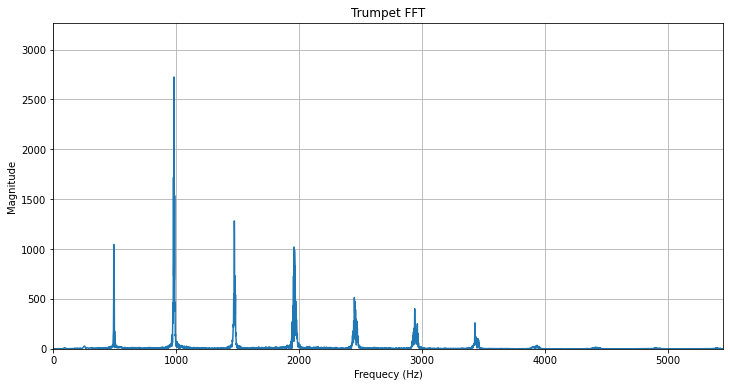

In [195]:
freq, spec = read_signal("res/trumpet.csv", ft="csv")

ymax = np.max(spec)
xmax = down_sample(ymax)

plt.clf()
plt.figure(figsize=(12, 6))
plt.grid()
plt.title("Trumpet FFT")
plt.axis((0, xmax, 0, ymax * MARGIN))
plt.xlabel("Frequecy (Hz)")
plt.ylabel("Magnitude")
plt.plot(freq, spec)

## Two Trumpets FFT

|Fundamental Frequecies (Hz)|
|:--------------------------|
|480                        |
|495                        |

1.4555
-1.3217


<Figure size 432x288 with 0 Axes>

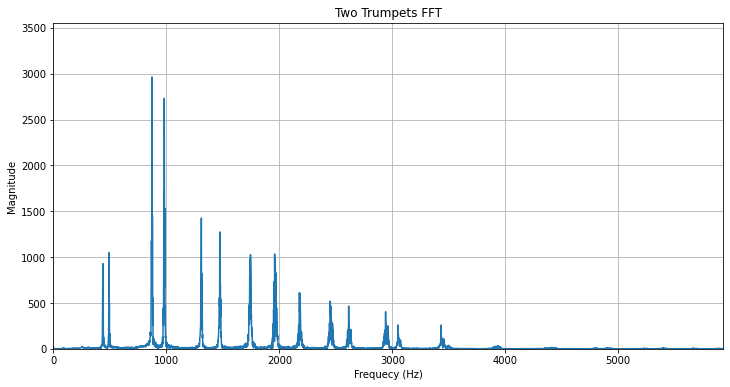

In [196]:

freq, spec = read_signal("res/twotrumpetsAB.csv", ft="csv")

ymax = np.max(spec)
xmax = down_sample(ymax)

plt.clf()
plt.figure(figsize=(12, 6))
plt.grid()
plt.title("Two Trumpets FFT")
plt.axis((0, xmax, 0, ymax * MARGIN))
plt.xlabel("Frequecy (Hz)")
plt.ylabel("Magnitude")
plt.plot(freq, spec)

## Piano 1 FFT

0.4793011367971313
-0.5000076295109483


<Figure size 432x288 with 0 Axes>

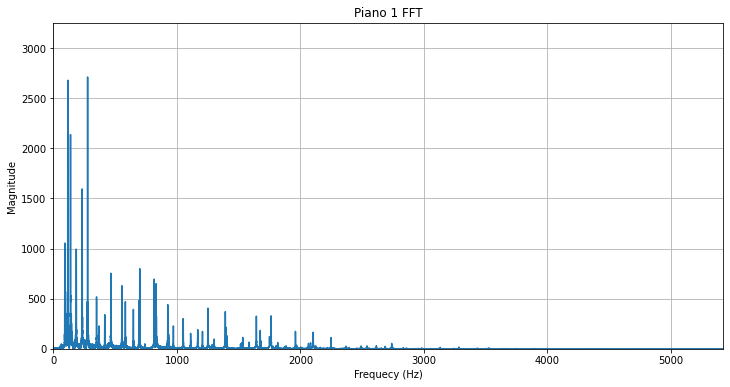

In [197]:
freq, spec = read_signal("res/piano1_mono.wav", ft="wav")

ymax = np.max(spec)
xmax = down_sample(ymax)

plt.clf()
plt.figure(figsize=(12, 6))
plt.grid()
plt.title("Piano 1 FFT")
plt.axis((0, xmax, 0, ymax * MARGIN))
plt.xlabel("Frequecy (Hz)")
plt.ylabel("Magnitude")
plt.plot(freq, spec)

## Piano 2 FFT

0.2665903715571832
-0.32822156099794003


<Figure size 432x288 with 0 Axes>

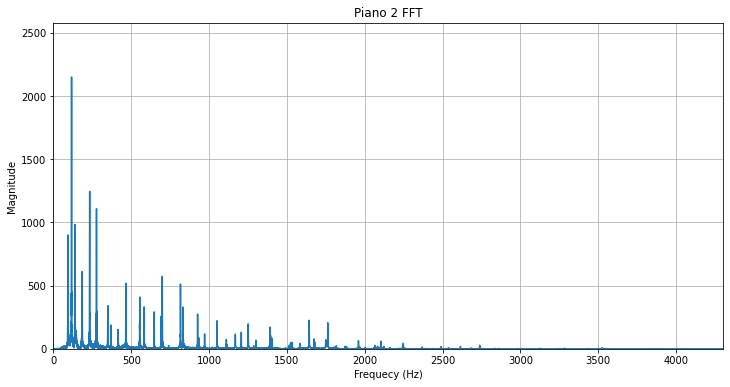

In [198]:
freq, spec = read_signal("res/piano2_mono.wav", ft="wav")

ymax = np.max(spec)
xmax = down_sample(ymax)

plt.clf()
plt.figure(figsize=(12, 6))
plt.grid()
plt.title("Piano 2 FFT")
plt.axis((0, xmax, 0, ymax * MARGIN))
plt.xlabel("Frequecy (Hz)")
plt.ylabel("Magnitude")
plt.plot(freq, spec)